# 0. Setup Paths

In [2]:
import os

In [3]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [4]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [5]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [6]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [9]:
if os.name=='nt':
    !pip install wget
    import wget

In [10]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [11]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

zsh:1: command not found: apt-get
Processing /Users/kanhaiyanayak/Desktop/my_project/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1663233 sha256=5f0827c93163636b7bd5dae5076be67189d6cc785765d0a698c02bc563ffca07
  Stored in directory: /private/var/folders/vj/bmpqqxdx40b70f76qm1cwlm40000gn/T/pip-ephem-wheel-cache-_gyi_nv8/wheels/62/17/17/ea8c6e8424f6625b6571d33a6544e6b205b22e60564b145fca
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [12]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2023-04-19 19:23:43.826395: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
Running tests under Python 3.9.12: /opt/anaconda3/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0419 19:23:57.894469 4453819904 batch_norm

W0419 19:23:58.015119 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.020170 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.025120 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.031260 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:23:58.122793 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.126646 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.130700 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.137682 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:23:58.277721 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.285938 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.289913 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.298918 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:23:58.592641 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.597280 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.600282 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.604559 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:23:58.690784 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.695301 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.702214 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.706371 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:23:58.797767 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.801404 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.806941 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.811968 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:23:58.892879 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.899198 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.903568 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:58.908330 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:23:58.997784 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:59.002411 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:59.008774 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.27s
I0419 19:23:59.026394 4453819904 test_util.py:2467] time(__main__.ModelBuilderTF2Test.test_create_

W0419 19:23:59.581178 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:59.585907 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:59.591464 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:59.595522 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:23:59.681882 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:59.687659 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:59.691679 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:59.697611 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:23:59.786390 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:59.791823 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:59.795492 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:59.801777 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:23:59.886381 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:59.891052 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:59.896508 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:23:59.901122 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:24:00.090934 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.095793 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.101273 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.105175 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:24:00.193048 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.199810 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.204104 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.211050 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:24:00.295738 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.301908 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.308973 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.312690 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:24:00.399838 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.404191 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.410243 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.414489 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:24:00.607116 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.613172 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.616831 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.624439 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:24:00.709069 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.714074 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.720708 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.724730 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:24:00.816301 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.819912 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.826159 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.831140 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

W0419 19:24:00.912058 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.919032 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.923557 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
W0419 19:24:00.930984 4453819904 batch_normalization.py:1426] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please 

INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_model_from_config_with_example_miner): 0.05s
I0419 19:24:04.442106 4453819904 test_util.py:2467] time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_model_from_config_with_example_miner): 0.05s
[       OK ] ModelBuilderTF2Test.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul): 0.2s
I0419 19:24:04.646234 4453819904 test_util.py:2467] time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul): 0.2s
[       OK ] ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[ RUN      ] ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_faster_rcnn_without_matmul
INFO:tensorflow:time(__main__.ModelBuilderTF2

I0419 19:24:13.214720 4453819904 efficientnet_model.py:143] round_filter input=192 output=192
I0419 19:24:13.214879 4453819904 efficientnet_model.py:143] round_filter input=320 output=320
I0419 19:24:13.491911 4453819904 efficientnet_model.py:143] round_filter input=1280 output=1280
I0419 19:24:13.560538 4453819904 efficientnet_model.py:453] Building model efficientnet with params ModelConfig(width_coefficient=1.0, depth_coefficient=1.1, resolution=240, dropout_rate=0.2, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=Fals

I0419 19:24:20.140590 4453819904 ssd_efficientnet_bifpn_feature_extractor.py:150] EfficientDet EfficientNet backbone version: efficientnet-b4
I0419 19:24:20.140759 4453819904 ssd_efficientnet_bifpn_feature_extractor.py:152] EfficientDet BiFPN num filters: 224
I0419 19:24:20.140835 4453819904 ssd_efficientnet_bifpn_feature_extractor.py:153] EfficientDet BiFPN num iterations: 7
I0419 19:24:20.143289 4453819904 efficientnet_model.py:143] round_filter input=32 output=48
I0419 19:24:20.167567 4453819904 efficientnet_model.py:143] round_filter input=32 output=48
I0419 19:24:20.167710 4453819904 efficientnet_model.py:143] round_filter input=16 output=24
I0419 19:24:20.363177 4453819904 efficientnet_model.py:143] round_filter input=16 output=24
I0419 19:24:20.363333 4453819904 efficientnet_model.py:143] round_filter input=24 output=32
I0419 19:24:20.815728 4453819904 efficientnet_model.py:143] round_filter input=24 output=32
I0419 19:24:20.815901 4453819904 efficientnet_model.py:143] round_fil

I0419 19:24:34.285661 4453819904 efficientnet_model.py:143] round_filter input=24 output=40
I0419 19:24:34.285818 4453819904 efficientnet_model.py:143] round_filter input=40 output=72
I0419 19:24:35.011533 4453819904 efficientnet_model.py:143] round_filter input=40 output=72
I0419 19:24:35.011688 4453819904 efficientnet_model.py:143] round_filter input=80 output=144
I0419 19:24:35.982224 4453819904 efficientnet_model.py:143] round_filter input=80 output=144
I0419 19:24:35.982382 4453819904 efficientnet_model.py:143] round_filter input=112 output=200
I0419 19:24:37.244214 4453819904 efficientnet_model.py:143] round_filter input=112 output=200
I0419 19:24:37.244373 4453819904 efficientnet_model.py:143] round_filter input=192 output=344
I0419 19:24:38.789764 4453819904 efficientnet_model.py:143] round_filter input=192 output=344
I0419 19:24:38.789921 4453819904 efficientnet_model.py:143] round_filter input=320 output=576
I0419 19:24:39.341806 4453819904 efficientnet_model.py:143] round_fi

In [ ]:
#!pip install tensorflow tensorflow-gpu --upgrade

In [47]:
#!pip install tensorflow-gpu
!pip install tensorflow


In [48]:
!pip install tensorflow --upgrade

In [49]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.20.3
Uninstalling protobuf-3.20.3:
  Successfully uninstalled protobuf-3.20.3
Found existing installation: matplotlib 3.2.0
Uninstalling matplotlib-3.2.0:
  Successfully uninstalled matplotlib-3.2.0
  Using cached protobuf-4.22.3-cp37-abi3-macosx_10_9_universal2.whl (397 kB)
  Using cached matplotlib-3.2.0-cp39-cp39-macosx_10_9_x86_64.whl
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yolov5 7.0.11 requires matplotlib>=3.2.2, but you have matplotlib 3.2.0 which is incompatible.
streamlit 1.20.0 requires protobuf<4,>=3.12, but you have protobuf 4.22.3 which is incompatible.
mysql-connector-python 8.0.32 requires protobuf<=3.20.3,>=3.11.0, but you have protobuf 4.22.3 which is incompatible.
apache-beam 2.46.0 requires protobuf<4,>3.12.2, but you have protobuf 4.22.3 which is incompatible.


In [7]:
import object_detection

In [52]:
!pip list

Package                         Version
------------------------------- --------------------
absl-py                         1.3.0
aiohttp                         3.8.1
aiosignal                       1.2.0
alabaster                       0.7.12
altair                          4.2.2
anaconda-client                 1.9.0
anaconda-navigator              2.2.0
anaconda-project                0.10.2
anyio                           3.5.0
apache-beam                     2.46.0
appdirs                         1.4.4
applaunchservices               0.2.1
appnope                         0.1.2
appscript                       1.1.2
argon2-cffi                     21.3.0
argon2-cffi-bindings            21.2.0
array-record                    0.2.0
arrow                           1.2.2
astroid                         2.6.6
astropy                         5.0.4
asttokens                       2.0.5
astunparse                      1.6.3
async-timeout                   4.0.2
atomicwrites                

In [15]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2023-04-19 19:25:50--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.167.176
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.167.176|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  6.32MB/s    in 3.1s    

2023-04-19 19:25:54 (6.32 MB/s) - 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz' saved [20515344/20515344]

x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint

# 2. Create Label Map

In [8]:
labels = [{'name':'licence', 'id':1},]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [9]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [55]:
!pip install pytz

In [10]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [11]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [12]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [13]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

2023-04-20 14:33:51.593076: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [16]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     override_base_feature_extractor_hyperparams: true
     use_depthwise: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10
       x_scale: 10
       height_scale: 5
       width_scale: 5
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
       unmatche

In [17]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [18]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [19]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [65]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [66]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [67]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=10000


In [68]:
!python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=10000

/opt/anaconda3/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
W0419 21:42:52.854166 4664116736 cross_device_ops.py:1387] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0419 21:42:52.872503 4664116736 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 10000
I0419 21:42:52.877467 4664116736 config_

I0419 21:43:46.817242 123145585889280 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0419 21:43:53.877082 123145585889280 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0419 21:43:59.855308 123145585889280 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0419 21:44:06.384456 123145585889280 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
INFO:tensorflow:Step 100 per-step time 2.407s
I0419 21:47:45.336853 4664116736 model_lib_v2.py:705] Step 100 per-step time 2.407s
INFO:tensorflow:{'Loss/classification_loss': 0.3830034,
 'Loss/localization_loss': 0.45141006,
 'Loss/regularization_loss': 0.15435429,
 'Loss/total_loss': 0.98876774,
 'learning_rate': 0.0319994}
I0419 21:47:45.337498 4664116736 model_lib_v2.py:708] {'Loss/classification_loss': 0.3830034,
 'Loss/localization_loss': 0.45141006,
 'Loss/regularization_loss': 0.15435429,
 'Loss/

INFO:tensorflow:Step 1500 per-step time 1.540s
I0419 22:23:22.786010 4664116736 model_lib_v2.py:705] Step 1500 per-step time 1.540s
INFO:tensorflow:{'Loss/classification_loss': 0.17541286,
 'Loss/localization_loss': 0.13206981,
 'Loss/regularization_loss': 0.15538862,
 'Loss/total_loss': 0.4628713,
 'learning_rate': 0.07997945}
I0419 22:23:22.786338 4664116736 model_lib_v2.py:708] {'Loss/classification_loss': 0.17541286,
 'Loss/localization_loss': 0.13206981,
 'Loss/regularization_loss': 0.15538862,
 'Loss/total_loss': 0.4628713,
 'learning_rate': 0.07997945}
INFO:tensorflow:Step 1600 per-step time 1.504s
I0419 22:25:53.214019 4664116736 model_lib_v2.py:705] Step 1600 per-step time 1.504s
INFO:tensorflow:{'Loss/classification_loss': 0.20224456,
 'Loss/localization_loss': 0.15502363,
 'Loss/regularization_loss': 0.15507147,
 'Loss/total_loss': 0.51233965,
 'learning_rate': 0.079970405}
I0419 22:25:53.214330 4664116736 model_lib_v2.py:708] {'Loss/classification_loss': 0.20224456,
 'Loss/

INFO:tensorflow:Step 3000 per-step time 1.743s
I0419 23:02:22.779546 4664116736 model_lib_v2.py:705] Step 3000 per-step time 1.743s
INFO:tensorflow:{'Loss/classification_loss': 0.11108419,
 'Loss/localization_loss': 0.11609196,
 'Loss/regularization_loss': 0.15060657,
 'Loss/total_loss': 0.37778273,
 'learning_rate': 0.0796716}
I0419 23:02:22.780122 4664116736 model_lib_v2.py:708] {'Loss/classification_loss': 0.11108419,
 'Loss/localization_loss': 0.11609196,
 'Loss/regularization_loss': 0.15060657,
 'Loss/total_loss': 0.37778273,
 'learning_rate': 0.0796716}
INFO:tensorflow:Step 3100 per-step time 1.743s
I0419 23:05:17.104185 4664116736 model_lib_v2.py:705] Step 3100 per-step time 1.743s
INFO:tensorflow:{'Loss/classification_loss': 0.1524165,
 'Loss/localization_loss': 0.13771378,
 'Loss/regularization_loss': 0.15016218,
 'Loss/total_loss': 0.44029248,
 'learning_rate': 0.07963799}
I0419 23:05:17.104701 4664116736 model_lib_v2.py:708] {'Loss/classification_loss': 0.1524165,
 'Loss/loc

INFO:tensorflow:Step 4500 per-step time 1.519s
I0419 23:47:42.450053 4664116736 model_lib_v2.py:705] Step 4500 per-step time 1.519s
INFO:tensorflow:{'Loss/classification_loss': 0.109821,
 'Loss/localization_loss': 0.13329715,
 'Loss/regularization_loss': 0.14406778,
 'Loss/total_loss': 0.38718593,
 'learning_rate': 0.07899711}
I0419 23:47:42.450353 4664116736 model_lib_v2.py:708] {'Loss/classification_loss': 0.109821,
 'Loss/localization_loss': 0.13329715,
 'Loss/regularization_loss': 0.14406778,
 'Loss/total_loss': 0.38718593,
 'learning_rate': 0.07899711}
INFO:tensorflow:Step 4600 per-step time 1.532s
I0419 23:50:15.627719 4664116736 model_lib_v2.py:705] Step 4600 per-step time 1.532s
INFO:tensorflow:{'Loss/classification_loss': 0.18201977,
 'Loss/localization_loss': 0.1582764,
 'Loss/regularization_loss': 0.14352934,
 'Loss/total_loss': 0.4838255,
 'learning_rate': 0.078939244}
I0419 23:50:15.628233 4664116736 model_lib_v2.py:708] {'Loss/classification_loss': 0.18201977,
 'Loss/loca

INFO:tensorflow:Step 6000 per-step time 1.470s
I0420 00:25:40.461539 4664116736 model_lib_v2.py:705] Step 6000 per-step time 1.470s
INFO:tensorflow:{'Loss/classification_loss': 0.12365772,
 'Loss/localization_loss': 0.10967524,
 'Loss/regularization_loss': 0.1372554,
 'Loss/total_loss': 0.37058836,
 'learning_rate': 0.07796223}
I0420 00:25:40.461830 4664116736 model_lib_v2.py:708] {'Loss/classification_loss': 0.12365772,
 'Loss/localization_loss': 0.10967524,
 'Loss/regularization_loss': 0.1372554,
 'Loss/total_loss': 0.37058836,
 'learning_rate': 0.07796223}
INFO:tensorflow:Step 6100 per-step time 1.479s
I0420 00:28:08.317519 4664116736 model_lib_v2.py:705] Step 6100 per-step time 1.479s
INFO:tensorflow:{'Loss/classification_loss': 0.10640876,
 'Loss/localization_loss': 0.06473465,
 'Loss/regularization_loss': 0.13695438,
 'Loss/total_loss': 0.30809778,
 'learning_rate': 0.077880636}
I0420 00:28:08.317860 4664116736 model_lib_v2.py:708] {'Loss/classification_loss': 0.10640876,
 'Loss/

INFO:tensorflow:Step 7500 per-step time 1.475s
I0420 01:02:57.551635 4664116736 model_lib_v2.py:705] Step 7500 per-step time 1.475s
INFO:tensorflow:{'Loss/classification_loss': 0.09535872,
 'Loss/localization_loss': 0.03351122,
 'Loss/regularization_loss': 0.13161454,
 'Loss/total_loss': 0.2604845,
 'learning_rate': 0.0765765}
I0420 01:02:57.551918 4664116736 model_lib_v2.py:708] {'Loss/classification_loss': 0.09535872,
 'Loss/localization_loss': 0.03351122,
 'Loss/regularization_loss': 0.13161454,
 'Loss/total_loss': 0.2604845,
 'learning_rate': 0.0765765}
INFO:tensorflow:Step 7600 per-step time 1.502s
I0420 01:05:27.793999 4664116736 model_lib_v2.py:705] Step 7600 per-step time 1.502s
INFO:tensorflow:{'Loss/classification_loss': 0.09017987,
 'Loss/localization_loss': 0.055316508,
 'Loss/regularization_loss': 0.13119493,
 'Loss/total_loss': 0.27669132,
 'learning_rate': 0.07647194}
I0420 01:05:27.794298 4664116736 model_lib_v2.py:708] {'Loss/classification_loss': 0.09017987,
 'Loss/lo

INFO:tensorflow:Step 9000 per-step time 1.495s
I0420 01:39:57.760218 4664116736 model_lib_v2.py:705] Step 9000 per-step time 1.495s
INFO:tensorflow:{'Loss/classification_loss': 0.06018993,
 'Loss/localization_loss': 0.034519408,
 'Loss/regularization_loss': 0.12495264,
 'Loss/total_loss': 0.21966197,
 'learning_rate': 0.07485275}
I0420 01:39:57.760519 4664116736 model_lib_v2.py:708] {'Loss/classification_loss': 0.06018993,
 'Loss/localization_loss': 0.034519408,
 'Loss/regularization_loss': 0.12495264,
 'Loss/total_loss': 0.21966197,
 'learning_rate': 0.07485275}
INFO:tensorflow:Step 9100 per-step time 1.701s
I0420 01:42:47.830355 4664116736 model_lib_v2.py:705] Step 9100 per-step time 1.701s
INFO:tensorflow:{'Loss/classification_loss': 0.067322224,
 'Loss/localization_loss': 0.046924476,
 'Loss/regularization_loss': 0.12446636,
 'Loss/total_loss': 0.23871306,
 'learning_rate': 0.07472619}
I0420 01:42:47.830691 4664116736 model_lib_v2.py:708] {'Loss/classification_loss': 0.067322224,
 

# 7. Evaluate the Model

In [78]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [79]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [80]:
!{command}

/opt/anaconda3/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
W0420 14:05:12.519114 4369962496 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0420 14:05:12.519397 4369962496 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0420 14:05:12.519531 4369962496 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs

INFO:tensorflow:Performing evaluation on 22 images.
I0420 14:05:59.100703 4369962496 coco_evaluation.py:293] Performing evaluation on 22 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0420 14:05:59.100991 4369962496 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0420 14:05:59.102526 4369962496 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.24s).
Accumulating evaluation results...
DONE (t=0.05s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.583
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.925
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.741
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.527
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.619
 Ave

# 8. Load Train Model From Checkpoint

In [20]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

/opt/anaconda3/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [21]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [22]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [35]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Cars411.png')

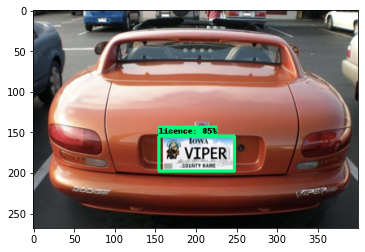

In [36]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [1]:
#apply ocr 

In [2]:
!pip install easyocr

     |████████████████████████████████| 2.9 MB 4.3 MB/s eta 0:00:01     |████▍                           | 389 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 134 kB 17.1 MB/s eta 0:00:01
     |████████████████████████████████| 270 kB 16.0 MB/s eta 0:00:01
     |████████████████████████████████| 45.9 MB 8.6 MB/s eta 0:00:012     |███████████████████████████▍    | 39.2 MB 6.3 MB/s eta 0:00:02     |███████████████████████████████▊| 45.5 MB 8.6 MB/s eta 0:00:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [3]:
# MPS acceleration is available on MacOS 12.3+
!pip install torch torchvision torchaudio

     |████████████████████████████████| 3.9 MB 3.8 MB/s eta 0:00:01


In [37]:
import easyocr

In [38]:
detection_threshold = 0.7

In [39]:
image = image_np_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

In [40]:
width = image.shape[1]
height = image.shape[0]

[0.578692   0.38644284 0.7373553  0.62213844]
[155.08946109 154.57713604 197.61121821 248.85537624]
[([[28, 8], [88, 8], [88, 32], [28, 32]], 'VIPER', 0.9998703975002075)]


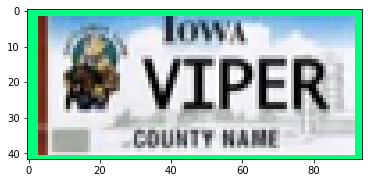

In [41]:
# Apply ROI filtering and OCR
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

In [42]:
for result in ocr_result:
    print(np.sum(np.subtract(result[0][2],result[0][1])))
    print(result[1])

24
VIPER


In [43]:
#ocr filtering

In [44]:
region_threshold = 0.05

In [45]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate

In [46]:
filter_text(region, ocr_result, region_threshold)

['VIPER']

In [47]:
#bring it together

In [48]:
region_threshold = 0.6

In [49]:
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        print(text)
        return text, region

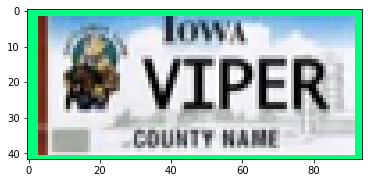

[]


In [50]:
text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)

In [51]:
#save result 
import csv
import uuid

In [52]:
'{}.jpg'.format(uuid.uuid1())

'20026728-df5c-11ed-b190-1c36bb1ea32c.jpg'

In [53]:
def save_results(text, region, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])

In [54]:
region

array([[[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [127, 255,   0],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [127, 255,   0],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [229, 180, 111],
        [127, 255,   0],
        [127, 255,   0]],

       ...,

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [245, 241, 245],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [253, 247, 252],
        [127, 255,   0],
        [127, 255,   0]],

       [[127, 255,   0],
        [127, 255,   0],
        [127, 255,   0],
        ...,
        [127, 255,   0],
        [127, 255,   0],
        [127, 255,   0]]

In [55]:
save_results(text, region, 'detection_results.csv', 'Detection_Images')

# 10. Real Time Detections from your Webcam

In [ ]:
#!pip uninstall opencv-python-headless -y

In [56]:
#

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    
    try: 
        text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
        save_results(text, region, 'realtimeresults.csv', 'Detection_Images')
    except:
        pass

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')